In [1]:
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
plt.rcParams['font.sans-serif'] = ['Heiti']
plt.rcParams['axes.unicode_minus'] = False

In [6]:
# 数据加载
data = load_iris()
x = data.data[:, :2]
y = data.target
features = data.feature_names[:2]

In [14]:
# 数据预处理
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=9)

In [15]:
# 构建模型
svm1 = svm.SVC(kernel='rbf')
svm2 = svm.SVC(kernel='linear')
svm3 = svm.SVC(kernel='poly')
svm4 = svm.SVC(kernel='sigmoid')

# 模型训练及训练时间
t0 = time()
svm1.fit(x_train, y_train)
t1 = time()
svm2.fit(x_train, y_train)
t2 = time()
svm3.fit(x_train, y_train)
t3 = time()
svm4.fit(x_train, y_train)
t4 = time()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

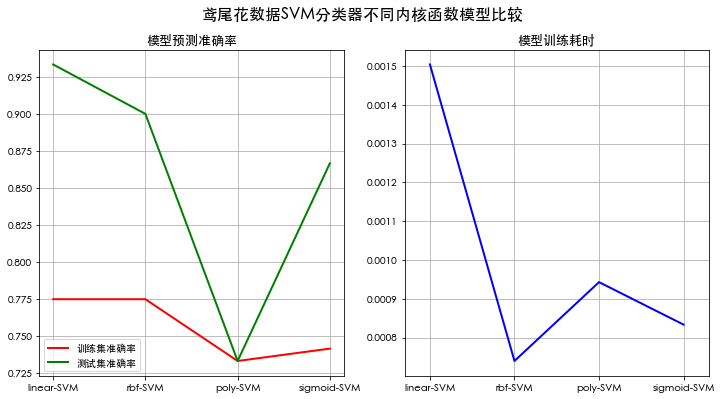

In [19]:
# 模型评估
svm1_train_socre = accuracy_score(y_train, svm1.predict(x_train))
svm1_test_socre = accuracy_score(y_test, svm1.predict(x_test))

svm2_train_socre = accuracy_score(y_train, svm2.predict(x_train))
svm2_test_socre = accuracy_score(y_test, svm2.predict(x_test))

svm3_train_socre = accuracy_score(y_train, svm3.predict(x_train))
svm3_test_socre = accuracy_score(y_test, svm3.predict(x_test))

svm4_train_socre = accuracy_score(y_train, svm4.predict(x_train))
svm4_test_socre = accuracy_score(y_test, svm4.predict(x_test))

x_tmp = range(4)

time_ = [t1 - t0, t2 - t1, t3 - t2, t4 - t3]
y_score1 = [svm1_train_socre, svm2_train_socre, svm3_train_socre, svm4_train_socre]
y_score2 = [svm1_test_socre, svm2_test_socre, svm3_test_socre, svm4_test_socre]

plt.figure(facecolor='w', figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_tmp, y_score1, 'r-', lw=2, label=u'训练集准确率')
plt.plot(x_tmp, y_score2, 'g-', lw=2, label=u'测试集准确率')

plt.legend(loc = 'lower left')
plt.title(u'模型预测准确率', fontsize=13)
plt.xticks(x_tmp, [u'linear-SVM', u'rbf-SVM', u'poly-SVM', u'sigmoid-SVM'], rotation=0)
plt.grid(b=True)

plt.subplot(122)
plt.plot(x_tmp, time_, 'b-', lw=2, label=u'模型训练时间')
plt.title(u'模型训练耗时', fontsize=13)
plt.xticks(x_tmp, [u'linear-SVM', u'rbf-SVM', u'poly-SVM', u'sigmoid-SVM'], rotation=0)
plt.xlim(-0.3, 3.3)
plt.grid(b=True)

plt.suptitle(u'鸢尾花数据SVM分类器不同内核函数模型比较', fontsize=16)

plt.show()